In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,"../../src/main")

In [4]:
import data

In [9]:
reload (data)

<module 'data' from '../../src/main/data.py'>

In [24]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [25]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwv']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [11]:
if 1:
    strategy = {'type':'rand', "fold":5}
    types=['fwvext']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [26]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['signal']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [27]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvdis']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvdis


In [40]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvcos']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvcos


In [50]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvsoftmax']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvsoftmax


In [102]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [66]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal','fwv']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [6]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal','fwv','fwvsoftmax','fwvcos','fwvdis']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvsoftmax
warning, unknown fwvcos
warning, unknown fwvdis


In [12]:
traintest.num_dataset()

5

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [15]:
testpred=[]
for fold in range(traintest.num_dataset()):
    print fold
    Xtr,ytr,Xte,yte=traintest.get_train_data(fold)
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape
    model = lgb.LGBMRegressor(n_estimators = 50000, n_jobs = 3, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    a = model.predict(testdf.values,  num_iteration=model.best_iteration)
    testpred.append(a)

0
(3347, 100) (3347,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.20289	valid_1's l1: 2.37925
[100]	training's l1: 1.9436	valid_1's l1: 2.21042
[150]	training's l1: 1.81785	valid_1's l1: 2.14655
[200]	training's l1: 1.7376	valid_1's l1: 2.11708
[250]	training's l1: 1.67594	valid_1's l1: 2.10096
[300]	training's l1: 1.62616	valid_1's l1: 2.09124
[350]	training's l1: 1.5816	valid_1's l1: 2.08795
[400]	training's l1: 1.54115	valid_1's l1: 2.08604
[450]	training's l1: 1.5046	valid_1's l1: 2.08293
[500]	training's l1: 1.47127	valid_1's l1: 2.08148
[550]	training's l1: 1.43924	valid_1's l1: 2.08202
[600]	training's l1: 1.40805	valid_1's l1: 2.08149
[650]	training's l1: 1.38005	valid_1's l1: 2.08203
Early stopping, best iteration is:
[492]	training's l1: 1.47616	valid_1's l1: 2.08029
1
(3347, 100) (3347,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.23055	valid_1's l1: 2.34432
[100]	training's l1: 1.96636	valid_1

In [10]:
testpred=[]
for fold in range(traintest.num_dataset()):
    print fold
    Xtr,ytr,Xte,yte=traintest.get_train_data(fold)
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape
    model = lgb.LGBMRegressor(n_estimators = 50000, n_jobs = 3, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    a = model.predict(testdf.values,  num_iteration=model.best_iteration)
    testpred.append(a)

0
(3347, 282) (3347,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.19004	valid_1's l1: 2.36635
[100]	training's l1: 1.91229	valid_1's l1: 2.18804
[150]	training's l1: 1.77949	valid_1's l1: 2.12468
[200]	training's l1: 1.69001	valid_1's l1: 2.10017
[250]	training's l1: 1.62506	valid_1's l1: 2.09475
[300]	training's l1: 1.56961	valid_1's l1: 2.08964
[350]	training's l1: 1.52047	valid_1's l1: 2.09158
[400]	training's l1: 1.47731	valid_1's l1: 2.09222
[450]	training's l1: 1.43535	valid_1's l1: 2.09272
Early stopping, best iteration is:
[294]	training's l1: 1.57566	valid_1's l1: 2.0891
1
(3347, 282) (3347,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.20415	valid_1's l1: 2.32985
[100]	training's l1: 1.93346	valid_1's l1: 2.13484
[150]	training's l1: 1.80098	valid_1's l1: 2.06477
[200]	training's l1: 1.71628	valid_1's l1: 2.03231
[250]	training's l1: 1.65013	valid_1's l1: 2.02171
[300]	training's l1: 1.59421	vali

In [16]:
pred = reduce(lambda u,v: u+v, testpred)/len(testpred)

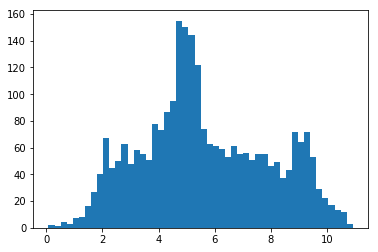

In [17]:
plt.hist(pred,bins=50);

In [18]:
a=pd.DataFrame(pred,index=testdf.index).reset_index()
a.columns=["seg_id","time_to_failure"]
a.shape

(2624, 2)

In [19]:
a.head()

seg_id  time_to_failure
0  seg_05a1b0         4.428312
1  seg_f0181d         5.314582
2  seg_5b7325         2.999547
3  seg_c6b514         3.311705
4  seg_52c139         9.926261

In [20]:
a.to_csv("../../input/sub/test_fwvext_5fold_lgb.csv",index=None)

In [24]:
b=pd.read_csv("../../input/sub/test_fwv_5fold_lgb.csv")

In [28]:
np.abs(b.time_to_failure-a.time_to_failure).median()

0.35505164701385894

In [33]:
c=pd.merge(a,b, on='seg_id')
np.abs(c['time_to_failure_x']-c['time_to_failure_y']).mean()

0.4298500961909391

In [38]:
pd.concat([a,b]).groupby('seg_id').mean().to_csv("../../input/sub/test_fwvext-fwv-mean_5fold_lgb.csv")